## Data load

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

same_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/one_hot_same.csv')
int_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/one_hot_int.csv')

Mounted at /content/drive


In [2]:
same_df.shape
same_df.head()

,Date,Open,High,Low,Close,Volume,Change,Transaction,SE_Operating_Profit,SE_Net_Profit,...,Exchange,SOX_Close,Phone,KR_Unemployment,Covid19,US_President_Republican,US_President_Democratic,KR_President_Democratic,KR_President_Conservative,KR_President_Neutral
0,2001-01-02,8.058327,8.125631,8.051978,8.116716,13.578683,0.304557,21.695398,29.834928,29.42326,...,1.119128,6.346163,1.960095,2.282322,False,1,0,1,0,0
1,2001-01-03,8.079928,8.137396,8.077137,8.122668,13.537307,0.304557,21.659975,29.834928,29.42326,...,1.063208,6.507576,1.960095,2.282322,False,1,0,1,0,0
2,2001-01-04,8.240121,8.261010,8.205218,8.237479,14.690249,1.027653,22.927728,29.834928,29.42326,...,0.929178,6.482801,1.960095,2.282322,False,1,0,1,0,0
3,2001-01-05,8.232174,8.273847,8.216088,8.268732,14.261954,1.750749,22.530686,29.834928,29.42326,...,1.004625,6.425679,1.960095,2.282322,False,1,0,1,0,0
4,2001-01-08,8.248006,8.271293,8.237479,8.263590,13.648169,-0.318132,21.911760,29.834928,29.42326,...,1.025041,6.452364,1.960095,2.282322,False,1,0,1,0,0


#### To make Boolean

In [3]:
same_df['Covid19'] = same_df['Covid19'].apply(lambda x: 1 if x else 0)
int_df['Covid19'] = int_df['Covid19'].apply(lambda x: 1 if x else 0)

In [4]:
boolean_columns = [
    "Covid19",
    "US_President_Republican",
    "US_President_Democratic",
    "KR_President_Democratic",
    "KR_President_Conservative",
    "KR_President_Neutral"
]

same_df[boolean_columns] = same_df[boolean_columns].astype(bool)
int_df[boolean_columns] = int_df[boolean_columns].astype(bool)

In [5]:
same_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       5865 non-null   object 
 1   Open                       5865 non-null   float64
 2   High                       5865 non-null   float64
 3   Low                        5865 non-null   float64
 4   Close                      5865 non-null   float64
 5   Volume                     5865 non-null   float64
 6   Change                     5865 non-null   float64
 7   Transaction                5865 non-null   float64
 8   SE_Operating_Profit        5865 non-null   float64
 9   SE_Net_Profit              5865 non-null   float64
 10  SE_Total_Equity            5865 non-null   float64
 11  SE_Total_Liabilities       5865 non-null   float64
 12  SE_Revenue                 5865 non-null   float64
 13  SE_Foreign                 5865 non-null   float

#### Set index

In [6]:
same_df.set_index('Date', inplace = True)
int_df.set_index('Date', inplace = True)

#### Normalization(only for LSTM), xy split

In [7]:
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral']
target = ['Close']

In [8]:
x_same = same_df[features].values
y_same = same_df[target].values

x_scaler, y_scaler = MinMaxScaler(), MinMaxScaler()

x_same_scaled = x_scaler.fit_transform(x_same)
y_same_scaled = y_scaler.fit_transform(y_same.reshape(-1, 1))

In [9]:
print(x_same_scaled.shape, y_same_scaled.shape)

(5865, 35) (5865, 1)


#### Train, Test split

In [10]:
N = len(same_df)
print(N)

5865


In [11]:
train_len = int(N*0.6)
val_len = int(N*0.2)
test_len = int(N*0.2)
print(train_len, val_len, test_len)

3519 1173 1173


In [12]:
x_train_same_df = x_same_scaled[:3519]
y_train_same_df = y_same_scaled[:3519]

x_val_same_df = x_same_scaled[3519:4692]
y_val_same_df = y_same_scaled[3519:4692]

x_test_same_df = x_same_scaled[4692:]
y_test_same_df = y_same_scaled[4692:]

In [13]:
print(len(x_train_same_df), len(x_val_same_df), len(x_test_same_df))
print(len(y_train_same_df), len(y_val_same_df), len(y_test_same_df))

3519 1173 1173
3519 1173 1173


In [14]:
x_train_same_df.shape

(3519, 35)

## 윈도우로 트레인,테스트 나누기  ㅇㅋㅇㅋ
## 하이퍼파라미터 튜닝
## 모델 레이어 쌓기
## 모델 예측 plot >>> wandb로 대체 ㅇㅋㅇㅋ
## same / interploation

In [15]:
# GPU가 사용 가능한지 확인
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # 첫 번째 GPU 메모리를 다 사용할 수 있도록 설정 (필요에 따라 조정 가능)
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU is set to be used.")
    except RuntimeError as e:
        print(f"Error setting GPU memory growth: {e}")
else:
    print("No GPU found. Using CPU instead.")

GPU is set to be used.


# Transformer (다시 keras)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

def create_sequences(data, target, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 5  # 예: 30일간의 데이터를 기반으로 예측
x_train, y_train = create_sequences(x_train_same_df, y_train_same_df, seq_length)
x_val, y_val = create_sequences(x_val_same_df, y_val_same_df, seq_length)
x_test, y_test = create_sequences(x_test_same_df, y_test_same_df, seq_length)

### VER1

In [ ]:
def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / d_model)
    angle_rads = pos * angle_rates

    # Apply sin to even indices; cos to odd indices
    pos_enc = np.zeros((seq_len, d_model))
    pos_enc[:, 0::2] = np.sin(angle_rads[:, 0::2])
    pos_enc[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return tf.convert_to_tensor(pos_enc, dtype=tf.float32)


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

def build_model(input_shape, seq_length, head_size=64, num_heads=4, ff_dim=128, num_layers=4, dropout=0.1):
    inputs = layers.Input(shape=input_shape)

    positional_enc = positional_encoding(seq_length, input_shape[1])
    inputs += tf.cast(positional_enc, dtype=tf.float32)
    x = inputs

    for _ in range(num_layers):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(1)(x)

    return models.Model(inputs, outputs, name = "Transformer")

model = build_model((seq_length, x_train.shape[2]), seq_length)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.summary()

Model: "Transformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ keras_tensor_209CLONE     │ (None, 30, 35)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_20   │ (None, 30, 35)         │         36,643 │ keras_tensor_209CLONE… │
│ (MultiHeadAttention)      │                        │                │ keras_tensor_209CLONE… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_71 (Dropout)      │ (None, 30, 35)         │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_40    │ (None, 30, 35)         │             70 │ dropout_71[1][0]       │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_38 (Add)              │ (None, 30, 35)         │              0 │ layer_normalization_4… │
│                           │                        │                │ keras_tensor_209CLONE… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_32 (Conv1D)        │ (None, 30, 128)        │          4,608 │ add_38[1][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_72 (Dropout)      │ (None, 30, 128)        │              0 │ conv1d_32[1][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_33 (Conv1D)        │ (None, 30, 35)         │          4,515 │ dropout_72[1][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_41    │ (None, 30, 35)         │             70 │ conv1d_33[1][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_39 (Add)              │ (None, 30, 35)         │              0 │ layer_normalization_4… │
│                           │                        │                │ add_38[1][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_21   │ (None, 30, 35)         │         36,643 │ add_39[1][0],          │
│ (MultiHeadAttention)      │                        │                │ add_39[1][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_74 (Dropout)      │ (None, 30, 35)         │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_42    │ (None, 30, 35)         │             70 │ dropout_74[1][0]       │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_40 (Add)              │ (None, 30, 35)         │              0 │ layer_normalization_4… │
│                           │                        │                │ add_39[1][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_34 (Conv1D)        │ (None, 30, 128)        │          4,608 │ add_40[1][0]           │
├──────────────────────

 Total params: 185,993 (726.54 KB)

 Trainable params: 185,993 (726.54 KB)

 Non-trainable params: 0 (0.00 B)

### VER2

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / d_model)
    angle_rads = pos * angle_rates

    # Apply sin to even indices; cos to odd indices
    pos_enc = np.zeros((seq_len, d_model))
    pos_enc[:, 0::2] = np.sin(angle_rads[:, 0::2])
    pos_enc[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return tf.convert_to_tensor(pos_enc, dtype=tf.float32)


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    attn_output = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = layers.Dropout(dropout)(attn_output)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs + x)

    res = x
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x + res)

    return x + res

def build_model(input_shape, seq_length, head_size=64, num_heads=4, ff_dim=128, num_layers=4, dropout=0.5):
    inputs = layers.Input(shape=input_shape)

    # Positional encoding 합성
    positional_enc = positional_encoding(seq_length, input_shape[1])
    positional_enc = tf.cast(positional_enc, dtype=tf.float32)

    # Broadcasting으로 합성
    positional_enc_layer = tf.keras.layers.Lambda(lambda x: x)(inputs + positional_enc)

    x = inputs
    for _ in range(num_layers):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.Dropout(dropout)(x)

    outputs = layers.Dense(1)(x)

    return models.Model(inputs, outputs, name="Transformer")


initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

# 모델 컴파일
model = build_model((seq_length, x_train.shape[2]), seq_length)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss="mse", metrics=["mae"])
model.summary()

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)]
)


Model: "Transformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, 30, 35)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_48   │ (None, 30, 35)         │         36,643 │ input_layer_14[0][0],  │
│ (MultiHeadAttention)      │                        │                │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_169 (Dropout)     │ (None, 30, 35)         │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_125 (Add)             │ (None, 30, 35)         │              0 │ input_layer_14[0][0],  │
│                           │                        │                │ dropout_169[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_96    │ (None, 30, 35)         │             70 │ add_125[0][0]          │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_88 (Conv1D)        │ (None, 30, 128)        │          4,608 │ layer_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_170 (Dropout)     │ (None, 30, 128)        │              0 │ conv1d_88[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_89 (Conv1D)        │ (None, 30, 35)         │          4,515 │ dropout_170[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_126 (Add)             │ (None, 30, 35)         │              0 │ conv1d_89[0][0],       │
│                           │                        │                │ layer_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_97    │ (None, 30, 35)         │             70 │ add_126[0][0]          │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_127 (Add)             │ (None, 30, 35)         │              0 │ layer_normalization_9… │
│                           │                        │                │ layer_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_49   │ (None, 30, 35)         │         36,643 │ add_127[0][0],         │
│ (MultiHeadAttention)      │                        │                │ add_127[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_172 (Dropout)     │ (None, 30, 35)         │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_128 (Add)             │ (None, 30, 35)         │              0 │ add_127[0][0],         │
│                           │                        │                │ dropout_172[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_98    │ (None, 30, 35)         │             70 │ add_128[0][0]          │
│ (LayerNormalization) 

 Total params: 190,153 (742.79 KB)

 Trainable params: 190,153 (742.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 51s 183ms/step - loss: 0.5847 - mae: 0.4094 - val_loss: 0.1608 - val_mae: 0.3244
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0780 - mae: 0.1454 - val_loss: 0.1484 - val_mae: 0.3263
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0581 - mae: 0.1255 - val_loss: 0.1351 - val_mae: 0.3200
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0485 - mae: 0.1236 - val_loss: 0.1197 - val_mae: 0.3057
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0428 - mae: 0.1239 - val_loss: 0.1181 - val_mae: 0.3109
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0379 - mae: 0.1234 - val_loss: 0.1109 - val_mae: 0.3048
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0346 - mae: 0.1227 - val_loss: 0.1137 - val_mae: 0.3136
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0319 - mae: 0.1221 - val_loss: 0.1152 - val_mae: 0.3191
Epoch 9/100
110/110 ━━━━━━━━━━━━━━━━━━

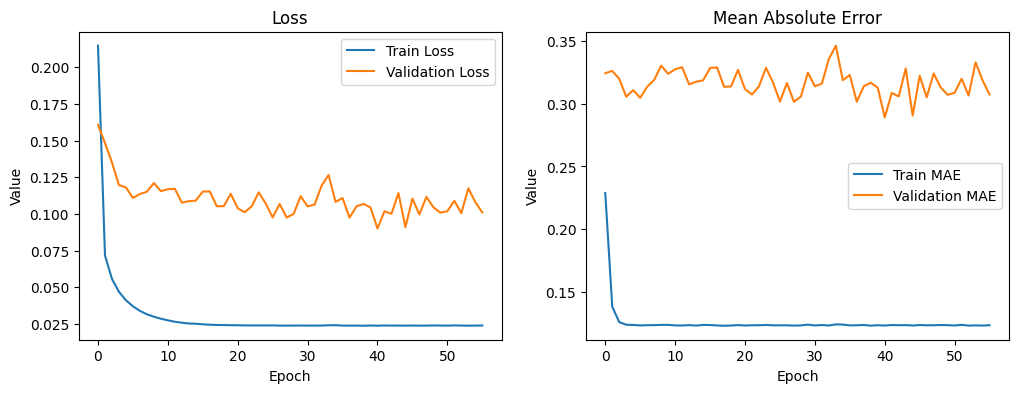

In [ ]:
import matplotlib.pyplot as plt

# 훈련 및 검증 손실 시각화
plt.figure(figsize=(12, 4))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

# MAE 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

plt.show()


--초기결과 오버피팅

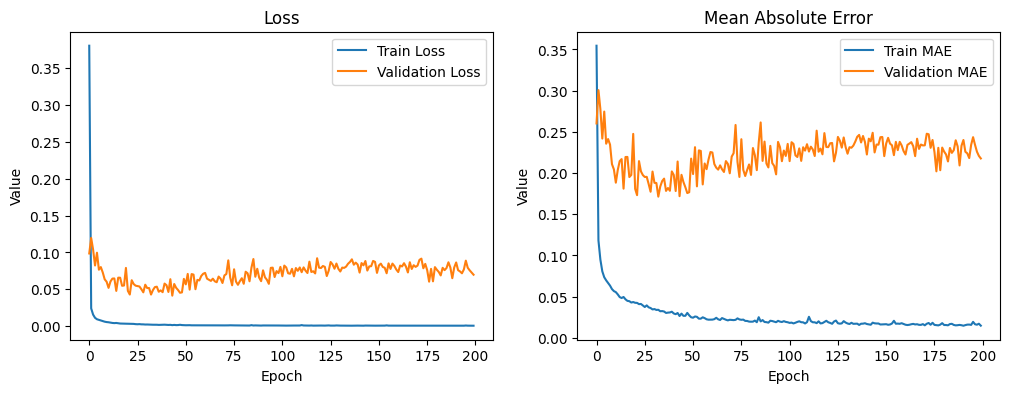

In [ ]:
import matplotlib.pyplot as plt

# 훈련 및 검증 손실 시각화
plt.figure(figsize=(12, 4))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

# MAE 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

plt.show()


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step
Mean Absolute Error (MAE): 1.417307652746118
Root Mean Squared Error (RMSE): 1.4257757296295104


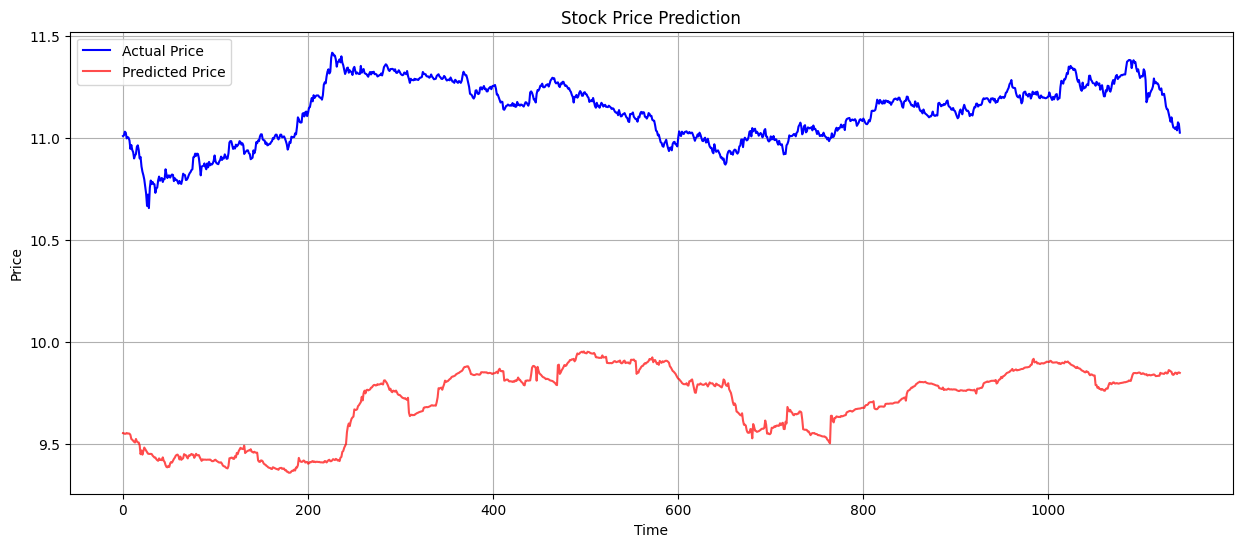

In [ ]:
y_pred = model.predict(x_test)

# 스케일 복원
y_test_actual = y_scaler.inverse_transform(y_test)
y_pred_actual = y_scaler.inverse_transform(y_pred)

# 오차 계산
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


# 그래프 시각화
plt.figure(figsize=(15, 6))
plt.plot(y_test_actual, label="Actual Price", color="b")
plt.plot(y_pred_actual, label="Predicted Price", color="r", alpha=0.7)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


In [ ]:
import random

param_grid = {
    'num_heads': [2, 4, 8],
    'head_size': [64, 128],
    'ff_dim': [128, 256],
    'dropout': [0.1, 0.2],
    'num_layers': [2, 4]
}

best_mae = float('inf')
best_params = {}

# Random Search 루프
for _ in range(10):
    random_params = {k: random.choice(v) for k, v in param_grid.items()}
    model = build_model((seq_length, x_train.shape[2]), seq_length, **random_params)

    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=32, verbose=0)

    val_mae = min(history.history['val_mae'])
    print(f"Random Params: {random_params}, Validation MAE: {val_mae}")

    if val_mae < best_mae:
        best_mae = val_mae
        best_params = random_params

print("Best Random Search Hyperparameters:", best_params)


### 하이퍼파라미터 튜닝 O

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.8 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

def model_builder(hp):
    model = build_model((seq_length, x_train.shape[2]),
                        seq_length,
                        head_size=hp.Int('head_size', 64, 256, step=64),
                        num_heads=hp.Int('num_heads', 2, 8, step=2),
                        ff_dim=hp.Int('ff_dim', 128, 512, step=128),
                        num_layers=hp.Int('num_layers', 2, 6, step=1),
                        dropout=hp.Float('dropout', 0.1, 0.5, step=0.1)
                       )
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

###가우시안 기반
tuner = kt.BayesianOptimization(
    model_builder,
    objective="val_loss",
    max_trials=10
)

###랜덤서치
# tuner = kt.RandomSearch(
#     model_builder,
#     objective="val_loss",
#     max_trials=20
# )

Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
from tensorflow.keras.optimizers import Adam

# 모델 튜닝 수행
tuner.search(x_train, y_train,
             validation_data=(x_val, y_val),
             epochs=20,
             batch_size=128)

# 최적 모델 반환 및 저장
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

path = '/content/drive/MyDrive/Time Series Project/Stock Price/Model/Transformer_model_path/'
name = 'hyper5.keras'
save_path = path + name

best_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
best_model.save(save_path)

Trial 10 Complete [00h 00m 48s]
val_loss: 0.055867232382297516

Best val_loss So Far: 0.012894995510578156
Total elapsed time: 00h 11m 12s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 74 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
best_model.summary()

Model: "Transformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ keras_tensor_1CLONE       │ (None, 30, 35)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 30, 35)         │        219,683 │ keras_tensor_1CLONE[1… │
│ (MultiHeadAttention)      │                        │                │ keras_tensor_1CLONE[1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 30, 35)         │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 30, 35)         │             70 │ dropout_1[1][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 30, 35)         │              0 │ layer_normalization[1… │
│                           │                        │                │ keras_tensor_1CLONE[1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 30, 128)        │          4,608 │ add_1[1][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 30, 128)        │              0 │ conv1d[1][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 30, 35)         │          4,515 │ dropout_2[1][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 30, 35)         │             70 │ conv1d_1[1][0]         │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 30, 35)         │              0 │ layer_normalization_1… │
│                           │                        │                │ add_1[1][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 30, 35)         │        219,683 │ add_2[1][0],           │
│ (MultiHeadAttention)      │                        │                │ add_2[1][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 30, 35)         │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 30, 35)         │             70 │ dropout_4[1][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 30, 35)         │              0 │ layer_normalization_2… │
│                           │                        │                │ add_2[1][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 30, 128)        │          4,608 │ add_3[1][0]            │
├──────────────────────

 Total params: 459,743 (1.75 MB)

 Trainable params: 459,743 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0033 - mae: 0.0436 - val_loss: 0.0292 - val_mae: 0.1496
Epoch 2/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mae: 0.0351 - val_loss: 0.0397 - val_mae: 0.1658
Epoch 3/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0021 - mae: 0.0336 - val_loss: 0.0339 - val_mae: 0.1551
Epoch 4/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020 - mae: 0.0328 - val_loss: 0.0255 - val_mae: 0.1383
Epoch 5/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020 - mae: 0.0331 - val_loss: 0.0224 - val_mae: 0.1360
Epoch 6/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019 - mae: 0.0324 - val_loss: 0.0306 - val_mae: 0.1488
Epoch 7/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021 - mae: 0.0330 - val_loss: 0.0267 - val_mae: 0.1417
Epoch 8/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0024 - mae: 0.0354 - val_loss: 0.0245 - val_mae: 0.1414
Epoch 9/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8

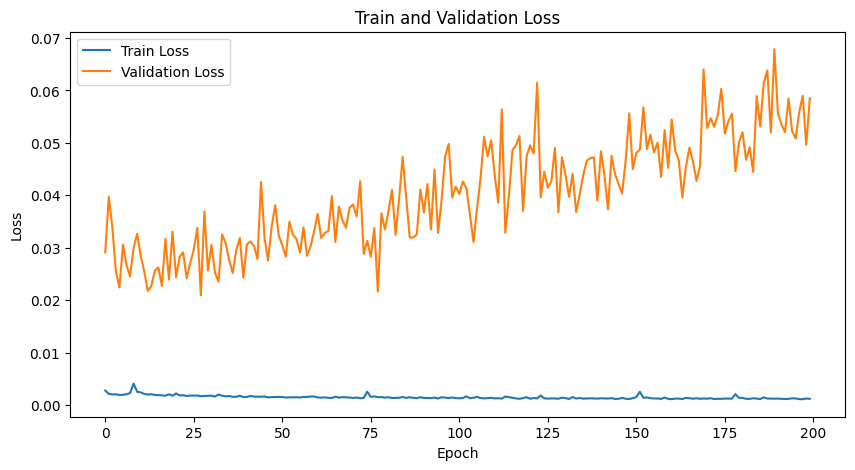

In [ ]:
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Time Series Project/Stock Price/Model/Transformer_model_path/'
m_name = 'model5.keras'

history = best_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[
        #tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint(path + m_name, save_best_only=True)
    ]
)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 1.0629515319598932
Root Mean Squared Error (RMSE): 1.0950084302716439


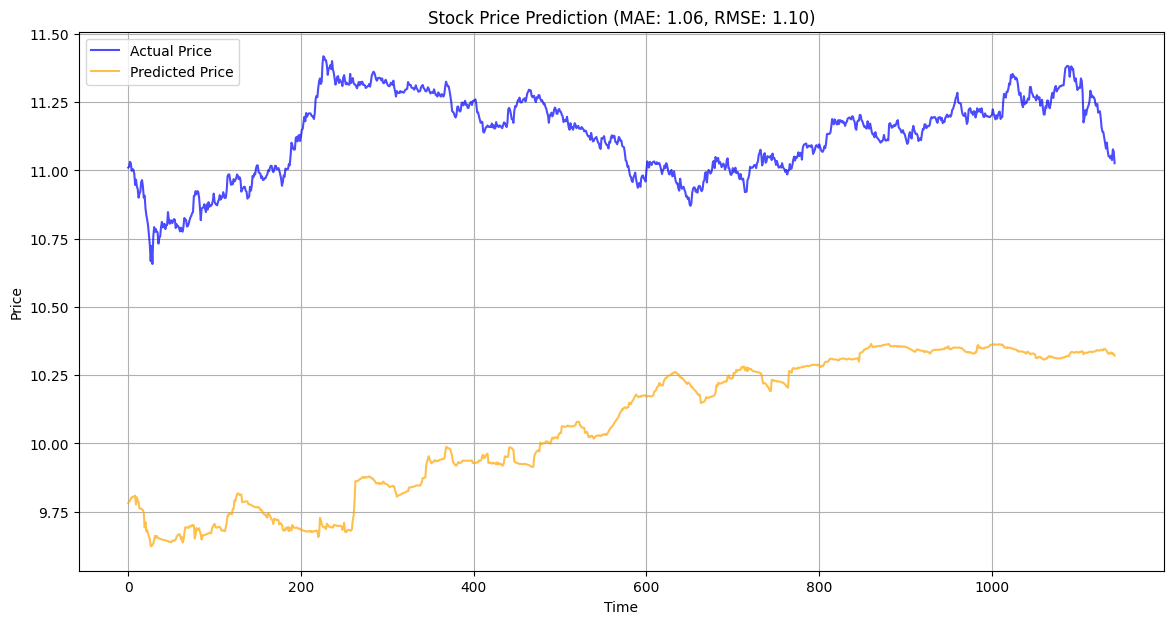

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델 예측 수행
y_test_pred = best_model.predict(x_test)

# 스케일 복원 (MinMaxScaler로 복원)
y_test_pred = y_scaler.inverse_transform(y_test_pred.reshape(-1, 1))
y_test_actual = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# 오차 계산
mae = mean_absolute_error(y_test_actual, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# 그래프 시각화
plt.figure(figsize=(14, 7))

plt.plot(y_test_actual, label='Actual Price', color='blue', alpha=0.7)
plt.plot(y_test_pred, label='Predicted Price', color='orange', alpha=0.7)

plt.title(f'Stock Price Prediction (MAE: {mae:.2f}, RMSE: {rmse:.2f})')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.grid(True)
plt.show()


### 하이퍼파라미터 튜닝X

In [ ]:
path = '/content/drive/MyDrive/Time Series Project/Stock Price/Model/Transformer_model_path'
m_name = 'w1.keras'

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[
        #tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint(path + m_name, save_best_only=True)
    ]
)

Epoch 1/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0168 - mae: 0.1008 - val_loss: 0.0432 - val_mae: 0.1805
Epoch 2/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0138 - mae: 0.0893 - val_loss: 0.0227 - val_mae: 0.1260
Epoch 3/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0108 - mae: 0.0803 - val_loss: 0.0303 - val_mae: 0.1507
Epoch 4/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0101 - mae: 0.0770 - val_loss: 0.0194 - val_mae: 0.1204
Epoch 5/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0110 - mae: 0.0813 - val_loss: 0.0402 - val_mae: 0.1764
Epoch 6/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0065 - mae: 0.0623 - val_loss: 0.0295 - val_mae: 0.1512
Epoch 7/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0074 - mae: 0.0664 - val_loss: 0.0387 - val_mae: 0.1755
Epoch 8/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0056 - mae: 0.0584 - val_loss: 0.0333 - val_mae: 0.1602
Epoch 9/200
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 

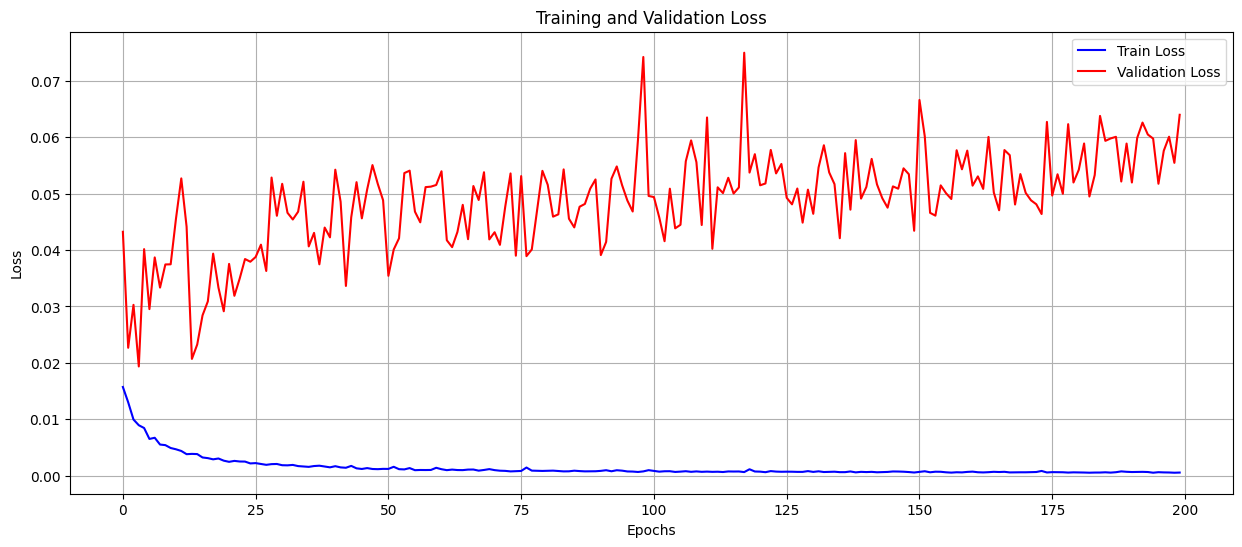

In [ ]:
# 손실 그래프 시각화
plt.figure(figsize=(15, 6))

# 훈련 및 검증 손실 그래프
plt.plot(history.history['loss'], label='Train Loss', color='b')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper right")
plt.grid(True)

plt.show()


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 0.7871225713776573
Root Mean Squared Error (RMSE): 0.8057067156901938


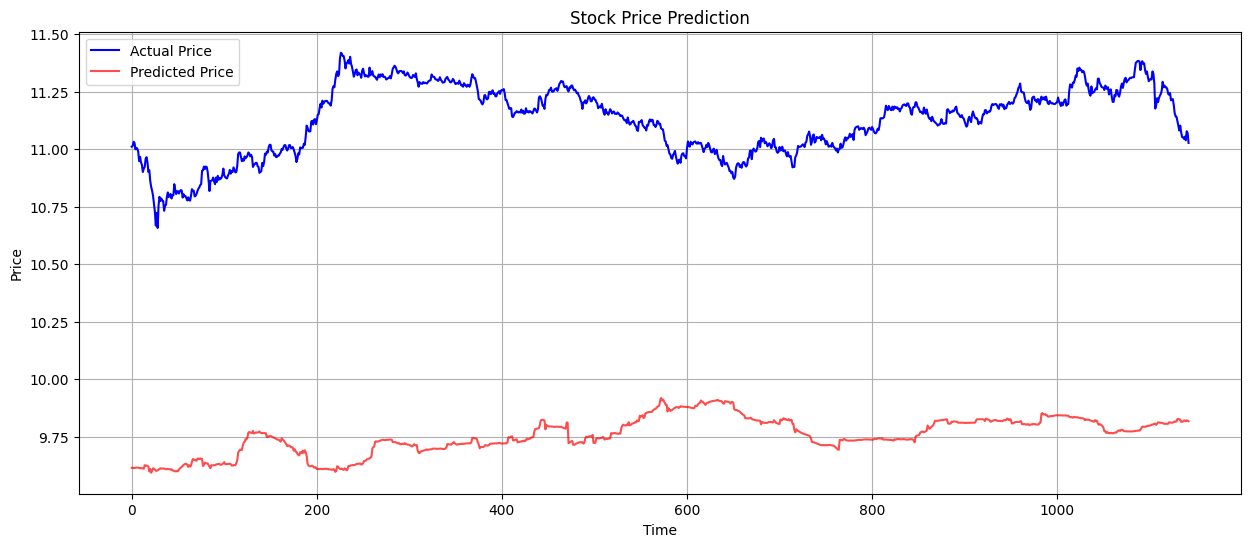

In [ ]:
y_pred = model.predict(x_test)

# 스케일 복원
y_test_actual = y_scaler.inverse_transform(y_test)
y_pred_actual = y_scaler.inverse_transform(y_pred)

# 오차 계산
mae = mean_absolute_error(y_test_actual, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


# 그래프 시각화
plt.figure(figsize=(15, 6))
plt.plot(y_test_actual, label="Actual Price", color="b")
plt.plot(y_pred_actual, label="Predicted Price", color="r", alpha=0.7)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


### 저장한 모델 불러오기

In [ ]:
# 저장한 모델 불러오기
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Time Series Project/Stock Price/transformer_stock_model.h5')

# 모델 테스트 예측 수행
loaded_y_pred = loaded_model.predict(x_test)

# 테스트 데이터 예측 결과 확인
loaded_y_pred_actual = y_scaler.inverse_transform(loaded_y_pred)

plt.figure(figsize=(15, 6))
plt.plot(y_test_actual, label="Actual Test Price", color='b')
plt.plot(loaded_y_pred_actual, label="Loaded Model Predicted Test Price", color='r', alpha=0.7)

plt.title('Stock Price Prediction from Saved Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc="upper left")
plt.grid(True)

plt.show()


# Transformer (Naive)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

def create_windows(data, window_size, target_size=1):
    """
    시계열 데이터를 윈도우 형태로 변환.
    :param data: 입력 데이터 (numpy array 또는 tensor)
    :param window_size: 입력 윈도우 크기 (e.g., 30)
    :param target_size: 출력 타겟의 크기 (e.g., 1)
    :return: 윈도우별 입력(X), 출력(Y)
    """
    X, Y = [], []
    for i in range(len(data) - window_size - target_size + 1):
        X.append(data[i:i + window_size])
        Y.append(data[i + window_size:i + window_size + target_size])
    return np.array(X), np.array(Y)


window_size = 60  # 입력 윈도우 크기
target_size = 1   # 예측할 값의 크기 (보통 1)

# 입력 데이터 윈도우링
x_train, y_train = create_windows(x_train_same_df, window_size, target_size)
x_val, y_val = create_windows(x_val_same_df, window_size, target_size)
x_test, y_test = create_windows(x_test_same_df, window_size, target_size)

# Tensor로 변환
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# 데이터 확인
print(f"x_train_tensor shape: {x_train_tensor.shape}")  # (batch_size, window_size, feature_dim)
print(f"y_train_tensor shape: {y_train_tensor.shape}")  # (batch_size, target_size, feature_dim)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

x_train_tensor shape: torch.Size([3459, 60, 35])
y_train_tensor shape: torch.Size([3459, 1, 35])


In [ ]:
# 포지셔널 인코딩
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.encoding = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(torch.log(torch.tensor(10000.0)) / d_model))
        self.encoding[:, 0::2] = torch.sin(position * div_term)
        self.encoding[:, 1::2] = torch.cos(position * div_term)
        self.encoding = self.encoding.unsqueeze(0)

    def forward(self, x):
        seq_len = x.size(1)
        return x + self.encoding[:, :seq_len, :].to(x.device)


class TransformerModel(nn.Module):
    def __init__(self, feature_dim, d_model, nhead, num_encoder_layers, dim_feedforward, dropout, target_size):
        super(TransformerModel, self).__init__()
        self.input_fc = nn.Linear(feature_dim, d_model)
        self.positional_encoding = PositionalEncoding(d_model)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout),
            num_layers=num_encoder_layers
        )
        self.output_fc = nn.Linear(d_model, target_size)

    def forward(self, x):
        x = self.input_fc(x)  # Map input to d_model dimension
        x = self.positional_encoding(x)  # Add positional encoding
        x = self.transformer_encoder(x)  # Pass through Transformer encoder
        x = x[:, -1, :]  # Use the last time step's output
        x = self.output_fc(x)  # Map to target size
        return x

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32, 1, 35])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([3, 1, 35])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/pyt

Epoch 1/20, Train Loss: 0.1960, Validation Loss: 0.1049
Epoch 2/20, Train Loss: 0.1081, Validation Loss: 0.1046
Epoch 3/20, Train Loss: 0.1067, Validation Loss: 0.1044
Epoch 4/20, Train Loss: 0.1057, Validation Loss: 0.1055
Epoch 5/20, Train Loss: 0.1051, Validation Loss: 0.1042
Epoch 6/20, Train Loss: 0.1050, Validation Loss: 0.1042
Epoch 7/20, Train Loss: 0.1044, Validation Loss: 0.1042
Epoch 8/20, Train Loss: 0.1043, Validation Loss: 0.1041
Epoch 9/20, Train Loss: 0.1041, Validation Loss: 0.1045
Epoch 10/20, Train Loss: 0.1041, Validation Loss: 0.1041
Epoch 11/20, Train Loss: 0.1040, Validation Loss: 0.1043
Epoch 12/20, Train Loss: 0.1041, Validation Loss: 0.1040
Epoch 13/20, Train Loss: 0.1039, Validation Loss: 0.1040
Epoch 14/20, Train Loss: 0.1038, Validation Loss: 0.1041
Epoch 15/20, Train Loss: 0.1039, Validation Loss: 0.1047
Epoch 16/20, Train Loss: 0.1038, Validation Loss: 0.1040
Epoch 17/20, Train Loss: 0.1038, Validation Loss: 0.1040
Epoch 18/20, Train Loss: 0.1039, Validat

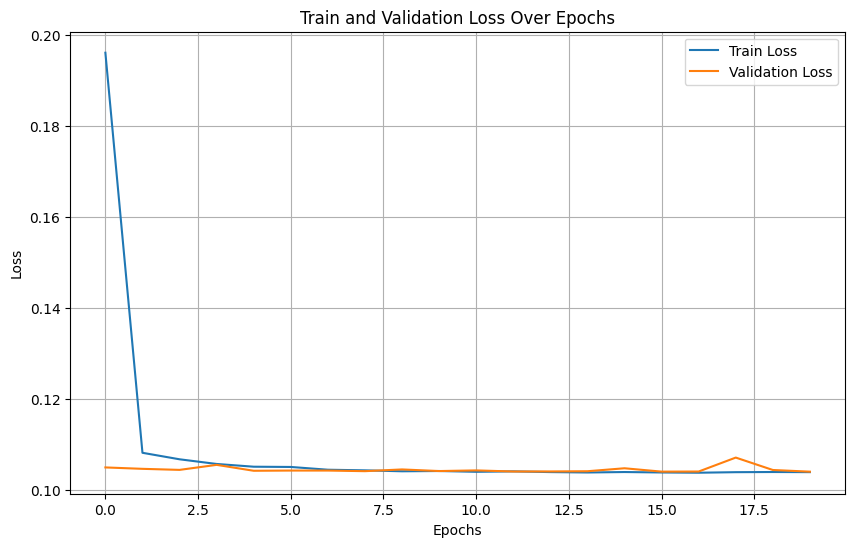

In [ ]:
# Hyperparameters
feature_dim = x_train_tensor.shape[2]  # Number of features in input data
d_model = 64  # Dimension of model
nhead = 8  # Number of attention heads
num_encoder_layers = 3  # Number of transformer encoder layers
dim_feedforward = 128  # Hidden layer dimension in the feedforward network
dropout = 0.1  # Dropout rate
target_size = 1  # Output size (e.g., predict next value)

# Model Initialization
model = TransformerModel(feature_dim, d_model, nhead, num_encoder_layers, dim_feedforward, dropout, target_size)
criterion = nn.MSELoss()  # Loss function for regression
t_optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            output = model(x_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for x_val_batch, y_val_batch in val_loader:
                val_output = model(x_val_batch)
                val_loss += criterion(val_output, y_val_batch).item()
        val_losses.append(val_loss / len(val_loader))

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")

    return train_losses, val_losses

# Train the model
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, t_optimizer, epochs=20)

# Plotting losses
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train and Validation Loss Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_losses(train_losses, val_losses)

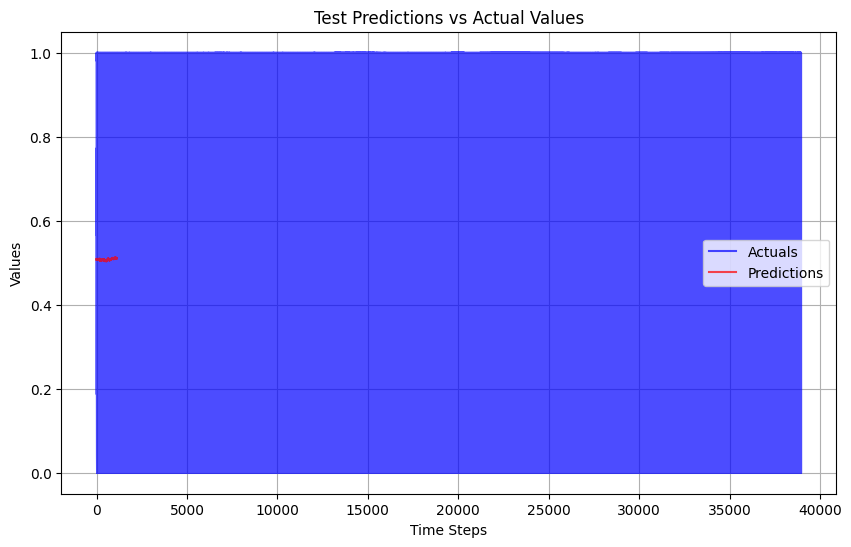

In [ ]:
# Visualize test results
def plot_test_results(model, test_loader):
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        for x_test_batch, y_test_batch in test_loader:
            test_output = model(x_test_batch)
            predictions.extend(test_output.numpy().flatten())
            actuals.extend(y_test_batch.numpy().flatten())

    plt.figure(figsize=(10, 6))
    plt.plot(actuals, label='Actuals', color='blue', alpha=0.7)
    plt.plot(predictions, label='Predictions', color='red', alpha=0.7)
    plt.xlabel('Time Steps')
    plt.ylabel('Values')
    plt.title('Test Predictions vs Actual Values')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_test_results(model, test_loader)

다시

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.encoding = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(np.log(10000.0) / d_model))
        self.encoding[:, 0::2] = torch.sin(position * div_term)
        self.encoding[:, 1::2] = torch.cos(position * div_term)
        self.encoding = self.encoding.unsqueeze(0)

    def forward(self, x):
        seq_len = x.size(1)
        return x + self.encoding[:, :seq_len, :].to(x.device)

class TransformerModel(nn.Module):
    def __init__(self, feature_dim, d_model, nhead, num_encoder_layers, dim_feedforward, dropout, target_size):
        super(TransformerModel, self).__init__()
        self.input_fc = nn.Linear(feature_dim, d_model)
        self.positional_encoding = PositionalEncoding(d_model)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward, dropout=dropout),
            num_layers=num_encoder_layers
        )
        self.output_fc = nn.Linear(d_model, target_size)

    def forward(self, x):
        x = self.input_fc(x)  # Map input to d_model dimension
        x = self.positional_encoding(x)  # Add positional encoding
        x = self.transformer_encoder(x)  # Pass through Transformer encoder
        x = x[:, -1, :]  # Use the last time step's output
        x = self.output_fc(x)  # Map to target size
        return x




/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([3, 1, 35])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([25, 1, 35])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/20, Train Loss: 0.1404, Validation Loss: 0.1066
Epoch 2/20, Train Loss: 0.1070, Validation Loss: 0.1057
Epoch 3/20, Train Loss: 0.1056, Validation Loss: 0.1050
Epoch 4/20, Train Loss: 0.1049, Validation Loss: 0.1047
Epoch 5/20, Train Loss: 0.1045, Validation Loss: 0.1042
Epoch 6/20, Train Loss: 0.1042, Validation Loss: 0.1042
Epoch 7/20, Train Loss: 0.1040, Validation Loss: 0.1041
Epoch 8/20, Train Loss: 0.1039, Validation Loss: 0.1043
Epoch 9/20, Train Loss: 0.1039, Validation Loss: 0.1046
Epoch 10/20, Train Loss: 0.1038, Validation Loss: 0.1040
Epoch 11/20, Train Loss: 0.1037, Validation Loss: 0.1041
Epoch 12/20, Train Loss: 0.1037, Validation Loss: 0.1041
Epoch 13/20, Train Loss: 0.1037, Validation Loss: 0.1041
Epoch 14/20, Train Loss: 0.1038, Validation Loss: 0.1041
Epoch 15/20, Train Loss: 0.1039, Validation Loss: 0.1041
Epoch 16/20, Train Loss: 0.1038, Validation Loss: 0.1044
Epoch 17/20, Train Loss: 0.1037, Validation Loss: 0.1043
Epoch 18/20, Train Loss: 0.1037, Validat

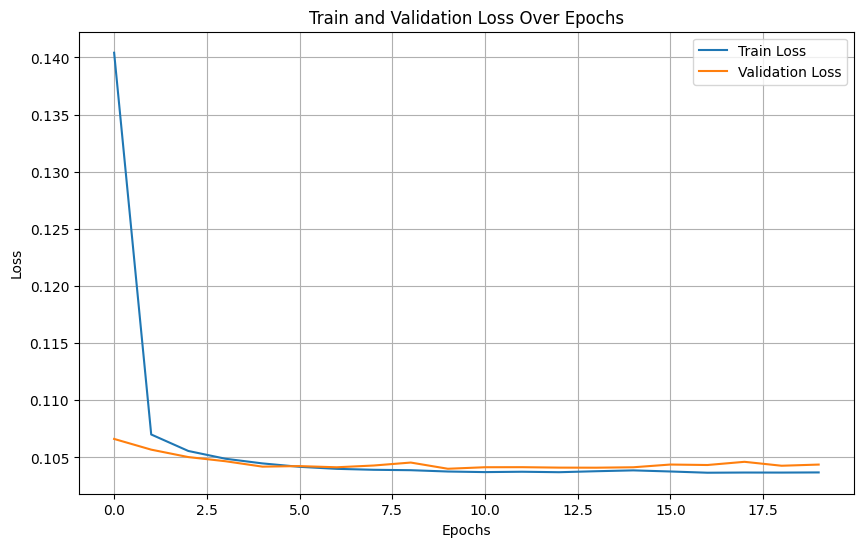

In [ ]:
# Hyperparameters
feature_dim = x_train_tensor.shape[2]  # Number of features in input data
d_model = 64  # Dimension of model
nhead = 8  # Number of attention heads
num_encoder_layers = 3  # Number of transformer encoder layers
dim_feedforward = 128  # Hidden layer dimension in the feedforward network
dropout = 0.1  # Dropout rate
target_size = 1  # Output size (e.g., predict next value)

# Model Initialization
model = TransformerModel(feature_dim, d_model, nhead, num_encoder_layers, dim_feedforward, dropout, target_size)
criterion = nn.MSELoss()  # Loss function for regression
t_optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            output = model(x_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for x_val_batch, y_val_batch in val_loader:
                val_output = model(x_val_batch)
                val_loss += criterion(val_output, y_val_batch).item()
        val_losses.append(val_loss / len(val_loader))

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")

    return train_losses, val_losses

# Train the model
train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, t_optimizer, epochs=20)

# Plotting losses
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train and Validation Loss Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_losses(train_losses, val_losses)



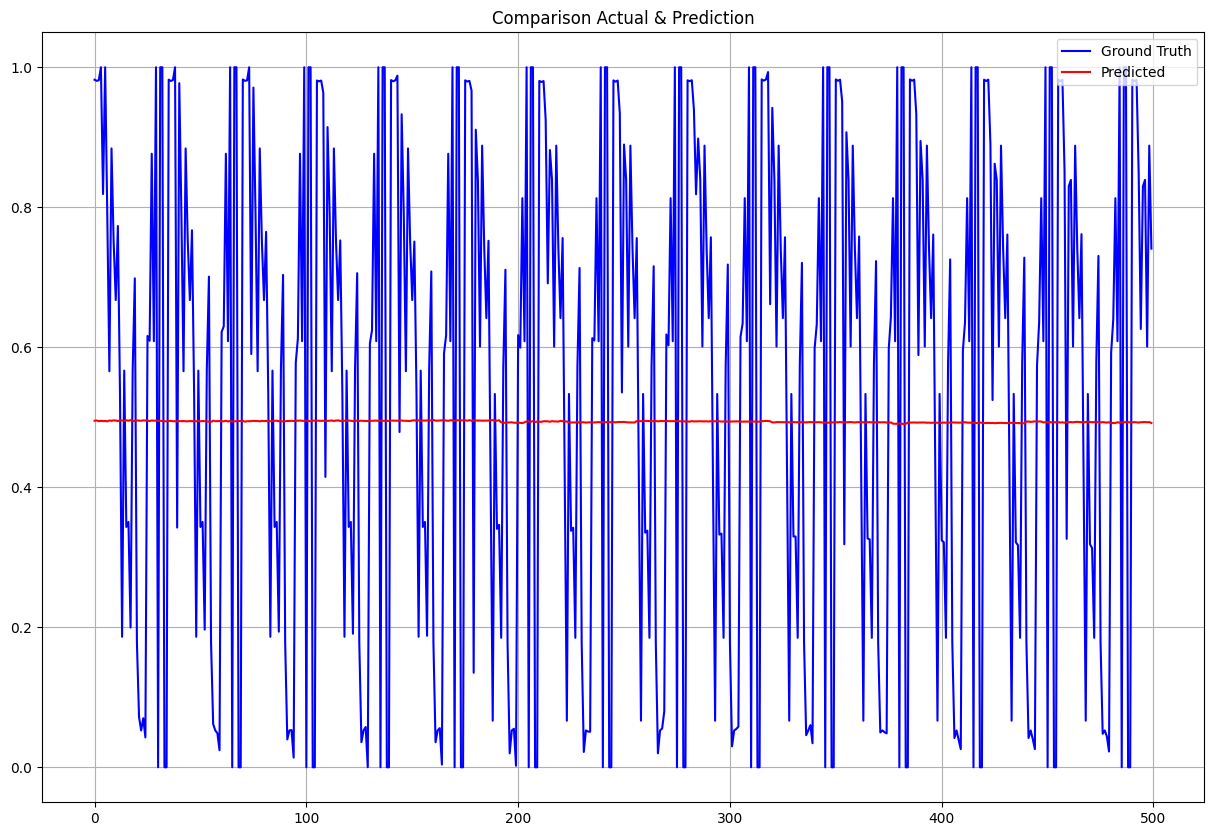

In [ ]:
# Visualize test results
def plot_test_results(model, test_loader):
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
      for x_test_batch, y_test_batch in test_loader:
          test_output = model(x_test_batch)

          # 텐서를 NumPy 배열로 변환하기 전에 확인
          test_output_np = test_output.cpu().numpy().flatten()
          y_test_batch_np = y_test_batch.cpu().numpy().flatten()

          predictions.extend(test_output_np)
          actuals.extend(y_test_batch_np)

      plt.figure(figsize=(15, 10))

      plt.plot(actuals[:500], label='Ground Truth', color="b")
      plt.plot(predictions[:500], label='Predicted', color="r")
      plt.title(f"Comparison Actual & Prediction")
      plt.grid(True)
      plt.legend(loc="upper right")
      plt.show()


plot_test_results(model, test_loader)

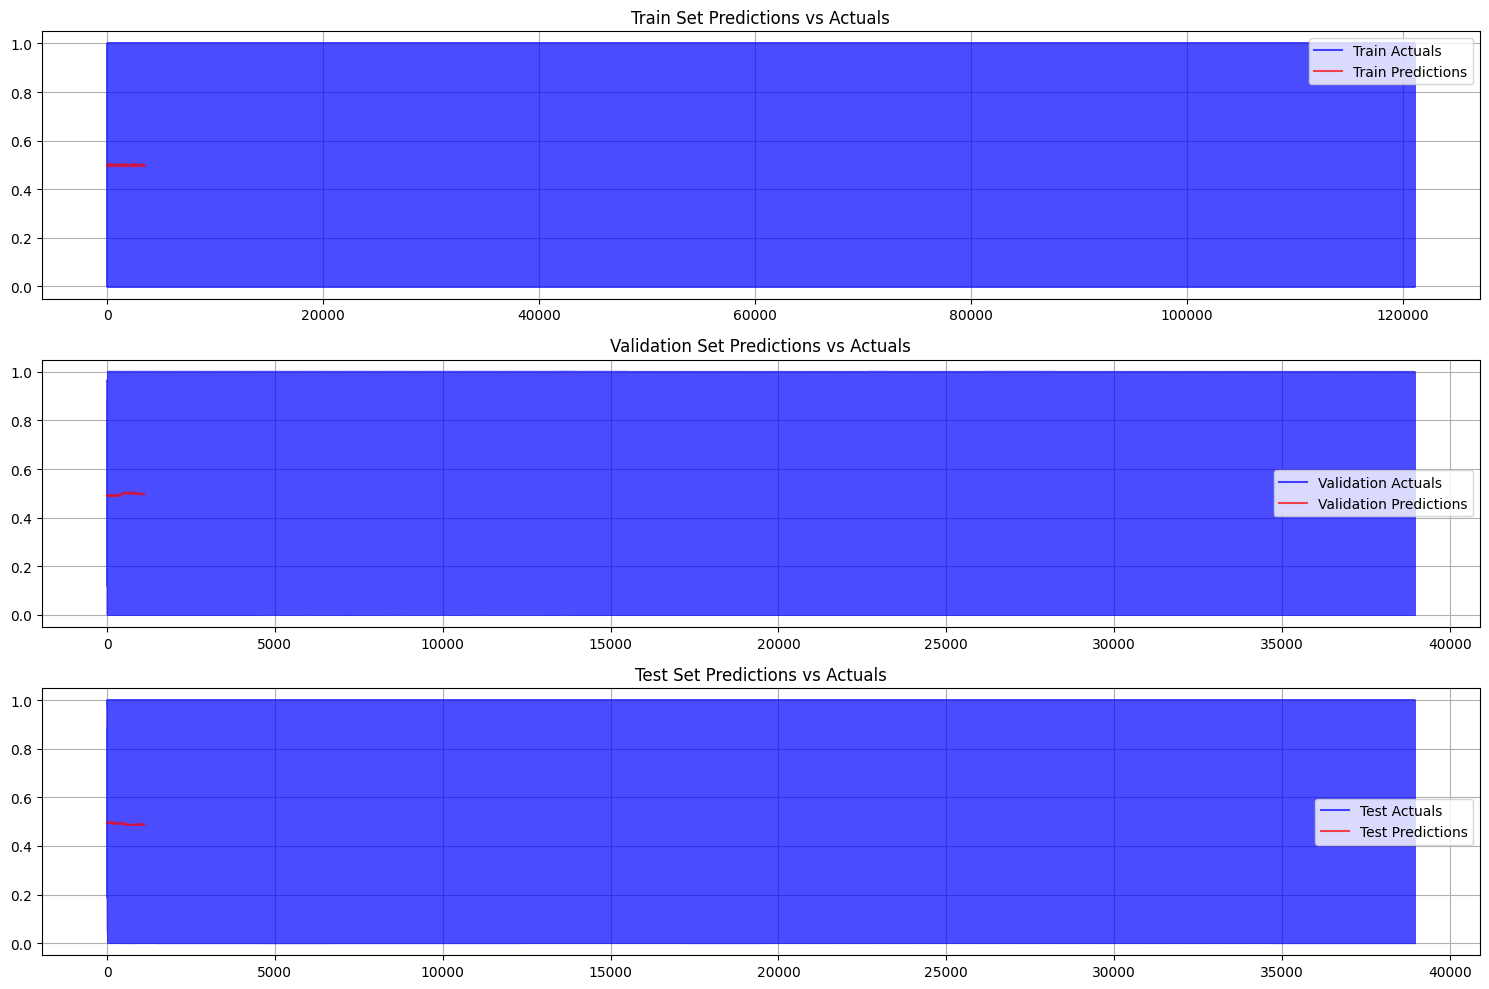

In [ ]:
# Visualize all sets
def visualize_all_sets(train_loader, val_loader, test_loader, model):
    model.eval()
    def extract_data(loader):
        data_x, data_y = [], []
        with torch.no_grad():
            for x_batch, y_batch in loader:
                output = model(x_batch)
                data_x.extend(output.numpy().flatten())
                data_y.extend(y_batch.numpy().flatten())
        return data_x, data_y

    train_pred, train_actual = extract_data(train_loader)
    val_pred, val_actual = extract_data(val_loader)
    test_pred, test_actual = extract_data(test_loader)

    plt.figure(figsize=(15, 10))

    plt.subplot(3, 1, 1)
    plt.plot(train_actual, label='Train Actuals', color='blue', alpha=0.7)
    plt.plot(train_pred, label='Train Predictions', color='red', alpha=0.7)
    plt.title('Train Set Predictions vs Actuals')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(val_actual, label='Validation Actuals', color='blue', alpha=0.7)
    plt.plot(val_pred, label='Validation Predictions', color='red', alpha=0.7)
    plt.title('Validation Set Predictions vs Actuals')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(test_actual, label='Test Actuals', color='blue', alpha=0.7)
    plt.plot(test_pred, label='Test Predictions', color='red', alpha=0.7)
    plt.title('Test Set Predictions vs Actuals')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

visualize_all_sets(train_loader, val_loader, test_loader, model)

#Transformer (wandb)

In [ ]:
!pip install wandb

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
#type(x_train_same_df) >>> numpy.ndarray
#x_train_same_df.shape >>> (3519, 35)

x_train_tensor = torch.tensor(x_train_same_df, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_same_df, dtype=torch.float32)
x_val_tensor = torch.tensor(x_val_same_df, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_same_df, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test_same_df, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_same_df, dtype=torch.float32)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)  # 순서 유지
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
# wandb 초기화
wandb.init(project="time-series-transformer", name = "6")  # 프로젝트 이름과 사용자명 설정

# 포지셔널 인코딩
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.encoding = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(torch.log(torch.tensor(10000.0)) / d_model))
        self.encoding[:, 0::2] = torch.sin(position * div_term)
        self.encoding[:, 1::2] = torch.cos(position * div_term)
        self.encoding = self.encoding.unsqueeze(0)

    def forward(self, x):
        seq_len = x.size(1)
        return x + self.encoding[:, :seq_len, :].to(x.device)

# 트랜스포머 기반 시계열 모델
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=128, nhead=8, num_layers=2, seq_len=30):
        super(TimeSeriesTransformer, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_dim)
        self.positional_encoding = PositionalEncoding(d_model=hidden_dim, max_len=seq_len)
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=nhead)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_layer = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # x shape: (batch_size, seq_len, input_dim)
        x = self.input_layer(x)  # (batch_size, seq_len, hidden_dim)
        x = self.positional_encoding(x)  # (batch_size, seq_len, hidden_dim)
        x = self.transformer_encoder(x)  # (batch_size, seq_len, hidden_dim)
        x = x.mean(dim=1)  # 평균 풀링 (Global Average Pooling)
        x = self.output_layer(x)  # (batch_size, output_dim)
        return x

x_train_tensor = x_train_tensor.unsqueeze(1)  # (batch_size, seq_len=1, input_dim)
x_val_tensor = x_val_tensor.unsqueeze(1)
x_test_tensor = x_test_tensor.unsqueeze(1)

# 모델 초기화
input_dim = x_train_tensor.shape[2]  # 피처 수 (35)
output_dim = y_train_tensor.shape[1]  # 출력 차원
seq_len = x_train_tensor.shape[1]  # 시계열 길이 (1)
model = TimeSeriesTransformer(input_dim=input_dim, output_dim=output_dim, seq_len=seq_len)

# 학습 준비
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# wandb에 모델 설정 로깅
wandb.watch(model, log="all")

# 학습 루프
def train_model(model, train_loader, val_loader, num_epochs=50):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        val_loss = 0
        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in val_loader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)
                outputs = model(x_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

        # wandb로 로깅
        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss / len(train_loader),
            "val_loss": val_loss / len(val_loader)
        })

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}")

# 모델 학습
train_model(model, train_loader, val_loader)


def evaluate_model(model, test_loader):
    model.eval()
    test_loss = 0
    all_predictions = []
    all_actuals = []

    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            test_loss += loss.item()

            # 예측 값과 실제 값 저장
            all_predictions.append(outputs.cpu().numpy())
            all_actuals.append(y_batch.cpu().numpy())

    # 예측 값과 실제 값 연결
    predictions = np.concatenate(all_predictions, axis=0)
    actuals = np.concatenate(all_actuals, axis=0)

    # WandB 테스트 손실 로깅
    wandb.log({"test_loss": test_loss / len(test_loader)})

    # 그래프 생성
    plt.figure(figsize=(12, 6))
    plt.plot(actuals, label="Actual")
    plt.plot(predictions, label="Predicted")
    plt.title("Actual vs Predicted")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()

    # WandB에 그래프 로깅
    wandb.log({"Prediction vs Actual Graph": wandb.Image(plt)})
    plt.show()

    print(f"Test Loss: {test_loss/len(test_loader):.4f}")


test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
evaluate_model(model, test_loader)

# 모델 저장
torch.save(model.state_dict(), "time_series_transformer.pth")
wandb.save("time_series_transformer.pth")


# 참고

In [ ]:
import numpy as np

def create_sequences(data, target, sequence_length):
    x_sequences, y_sequences = [], []
    for i in range(len(data) - sequence_length):
        x_sequences.append(data[i:i + sequence_length])
        y_sequences.append(target[i + sequence_length])
    return np.array(x_sequences), np.array(y_sequences)

sequence_length = 30  # 원하는 시퀀스 길이
x_train_seq, y_train_seq = create_sequences(x_train_same_df, y_train_same_df, sequence_length)
x_val_seq, y_val_seq = create_sequences(x_val_same_df, y_val_same_df, sequence_length)
x_test_seq, y_test_seq = create_sequences(x_test_same_df, y_test_same_df, sequence_length)


In [ ]:
x_train_same_df.shape

(3519, 35)

In [ ]:
x_train_seq.shape

(3489, 30, 35)

In [ ]:
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# 트랜스포머 모델 정의
def build_transformer_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # 트랜스포머 인코더
    x = layers.MultiHeadAttention(num_heads=4, key_dim=64)(inputs, inputs)
    x = layers.LayerNormalization()(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.GlobalAveragePooling1D()(x)

    # 출력 레이어
    outputs = layers.Dense(1, activation="linear")(x)
    model = tf.keras.Model(inputs, outputs)
    return model

input_shape = (x_train_seq.shape[1], x_train_seq.shape[2])  # (sequence_length, feature_count)
model = build_transformer_model(input_shape)

# 모델 컴파일
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# 모델 요약 출력
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 30, 35)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 30, 35)         │         36,643 │ input_layer[0][0],     │
│ (MultiHeadAttention)      │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 30, 35)         │             70 │ multi_head_attention[… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 30, 64)         │          2,304 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 64)             │              0 │ dense[0][0]            │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │             65 │ global_average_poolin… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 39,082 (152.66 KB)

 Trainable params: 39,082 (152.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 학습
history = model.fit(
    x_train_seq, y_train_seq,
    validation_data=(x_val_seq, y_val_seq),
    epochs=20,
    batch_size=32
)


Epoch 1/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.1170 - mae: 0.1889 - val_loss: 0.0359 - val_mae: 0.1579
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0012 - mae: 0.0273 - val_loss: 0.0266 - val_mae: 0.1382
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 9.1250e-04 - mae: 0.0239 - val_loss: 0.0221 - val_mae: 0.1261
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 8.3437e-04 - mae: 0.0232 - val_loss: 0.0205 - val_mae: 0.1207
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 6.9739e-04 - mae: 0.0212 - val_loss: 0.0250 - val_mae: 0.1319
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 7.0157e-04 - mae: 0.0215 - val_loss: 0.0177 - val_mae: 0.1138
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 7.7197e-04 - mae: 0.0220 - val_loss: 0.0163 - val_mae: 0.1111
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0010 - mae: 0.0251 - val_loss: 0.0298 - val_mae: 0.1442
Epoch 9/20
110/110 ━━━━━━━━━

In [ ]:
# 모델 평가
test_loss, test_mae = model.evaluate(x_test_seq, y_test_seq)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0760 - mae: 0.2689
Test Loss: 0.06937578320503235, Test MAE: 0.2570689916610718
